In [1]:
import pandas as pd
import numpy
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
X = train.drop(['Transported'], axis = 1)
y = train['Transported']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [6]:
 ('dummify_ecg', make_pipeline(cat_imputer, enc1), ['HomePlanet']),
    ('dummify_cp', make_pipeline(cat_imputer, enc1), ['CryoSleep']),
    ("dummify_dest", make_pipeline(cat_imputer, enc1), ['Destination']),
    ("dummify_vip", make_pipeline(cat_imputer, enc1), ['VIP']),
    ('nums', make_pipeline(num_imputer, FunctionTransformer(lambda x: x)), 
     ['Age', "RoomService", "FoodCourt", "ShoppingMall","Spa", "VRDeck"])

IndentationError: unexpected indent (1418156183.py, line 2)

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
enc1 = OneHotEncoder(handle_unknown='ignore')

# Separate imputers for categorical and numerical data
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')
enc1 =  OneHotEncoder(sparse_output = False, handle_unknown='ignore')

ct1 = ColumnTransformer([
    ("ic", cat_imputer, ['HomePlanet', "CryoSleep", "Destination", "VIP"]),
    ("in", num_imputer, ['Age', "RoomService", "FoodCourt", "ShoppingMall","Spa", "VRDeck"])
])

ct2 = ColumnTransformer([
    ('dummify_ecg',enc1, ['HomePlanet']),
    ('dummify_cp', enc1, ['CryoSleep']),
    ("dummify_dest", enc1, ['Destination']),
    ("dummify_vip", enc1, ['VIP']),
    ('nums', StandardScaler(), 
     ['in__Age', "in__RoomService", "in__FoodCourt", "in__ShoppingMall","in__Spa", "in__VRDeck"])
], remainder='drop')

# Pipeline with KNN Classifier
Knn1 = Pipeline([
    ("impute_everything", ip),
    ('dummify_everything', ct),
    ('KNN', KNeighborsClassifier())
])

# Grid Search
neigh = {'KNN__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
gscv1 = GridSearchCV(Knn1, neigh, cv=5, scoring='accuracy')
gscv1fit = gscv1.fit(X_train, y_train)


ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\utils\__init__.py", line 423, in _get_column_indices
    all_columns = X.columns
                  ^^^^^^^^^
AttributeError: 'numpy.ndarray' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\pipeline.py", line 370, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\pipeline.py", line 950, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\compose\_column_transformer.py", line 740, in fit_transform
    self._validate_column_callables(X)
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\compose\_column_transformer.py", line 448, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\utils\__init__.py", line 425, in _get_column_indices
    raise ValueError(
ValueError: Specifying the columns using strings is only supported for pandas DataFrames


In [42]:
import numpy as np
gscv1fit = gscv1.fit(X_train, y_train)

# Ensure that the best parameters are found
best_n_neighbors = gscv1fit.best_params_.get('KNN__n_neighbors', 5)  # Default to 5 if not found

# Final KNN pipeline
Knn1 = Pipeline([
    ('dummify_everything', ct),
    ('KNN', KNeighborsClassifier(n_neighbors=best_n_neighbors))
])

fit = Knn1.fit(X_train, y_train)
cross_val_score(Knn1,X,y, scoring = 'accuracy').mean()

ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\utils\__init__.py", line 423, in _get_column_indices
    all_columns = X.columns
                  ^^^^^^^^^
AttributeError: 'numpy.ndarray' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\pipeline.py", line 370, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\pipeline.py", line 950, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\compose\_column_transformer.py", line 740, in fit_transform
    self._validate_column_callables(X)
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\compose\_column_transformer.py", line 448, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\utils\__init__.py", line 425, in _get_column_indices
    raise ValueError(
ValueError: Specifying the columns using strings is only supported for pandas DataFrames


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
enc1 = OneHotEncoder(handle_unknown='ignore')

# Separate imputers for categorical and numerical data
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')

ct = ColumnTransformer([
    ('dummify_ecg', make_pipeline(cat_imputer, enc1), ['HomePlanet']),
    ('dummify_cp', make_pipeline(cat_imputer, enc1), ['CryoSleep']),
    ("dummify_dest", make_pipeline(cat_imputer, enc1), ['Destination']),
    ("dummify_vip", make_pipeline(cat_imputer, enc1), ['VIP']),
    ('nums', make_pipeline(num_imputer, StandardScaler()), 
     ['Age', "RoomService", "FoodCourt", "ShoppingMall","Spa", "VRDeck"])
], remainder='drop')

# Pipeline with KNN Classifier

# Final KNN pipeline
log = Pipeline([
    ('dummify_everything', ct),
    ('KNN', LogisticRegression())
])

fit = log.fit(X_train, y_train)
cross_val_score(log,X,y, scoring = 'accuracy').mean()

0.7854600775150196

In [20]:
DT1 = Pipeline(
    [('dummify_everything', ct),('DT1', DecisionTreeClassifier())]
)
neigh = {'DT1__max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,23,24], 'DT1__min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

gscv = GridSearchCV(DT1, neigh, cv = 5, scoring='accuracy')
gscvfit = gscv.fit(X_train,y_train)

In [21]:
gscvfit.best_params_

{'DT1__max_depth': 7, 'DT1__min_samples_split': 16}

In [23]:
DT1 = Pipeline(
    [('dummify_everything', ct),('DT1', DecisionTreeClassifier(max_depth= 7, min_samples_split= 16))]
)
cv2 = cross_val_score(DT1, X,y, cv=5, scoring = "accuracy")
cv2.mean()

0.7763727417646082

IndexError: list index out of range

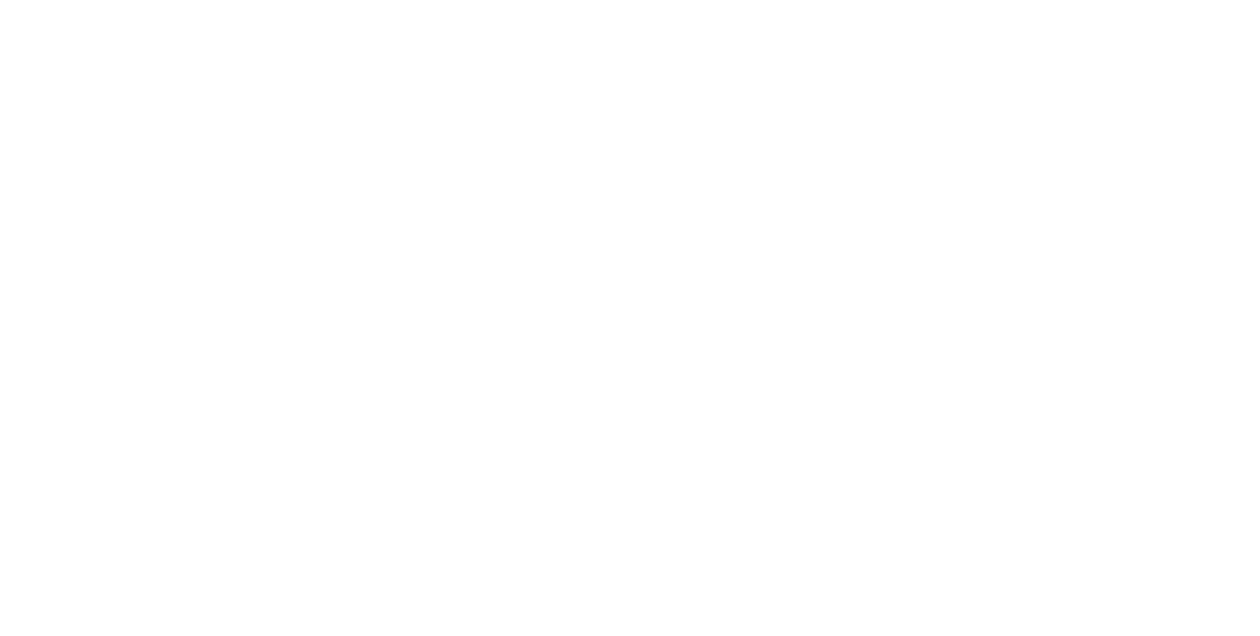

In [28]:
DT1fit = DT1.fit(X,y)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(DT1fit.named_steps['DT1'], feature_names=X_train.columns.tolist(), class_names=['false', 'true'], filled=True)
plt.show()

In [11]:
test_preds = fit.predict(test)

In [12]:
len(test_preds)

4277

In [13]:
test_new = test.copy()

In [14]:
test_new['Transported'] = test_preds

In [15]:
submission = test_new[['PassengerId', 'Transported']]
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [96]:
#submission.to_csv("first_submission.csv", index=False)